In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')



[I] m            : 2000
[I] n            : 1000
[I] k            : 5
[I] overlap_flag : True
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 2023
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


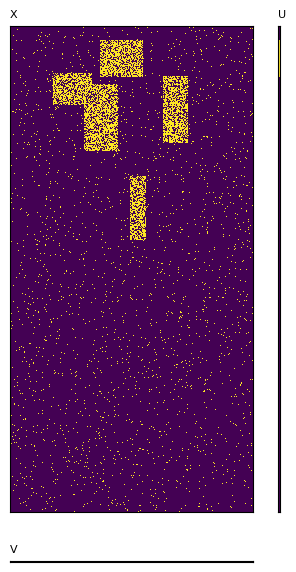

In [2]:
# generate arbitrary Boolean matrix (X)
from generators import DiagBooleanMatrix, ArbiBooleanMatrix, SynthBooleanMatrix

n_row=2000
n_col=1000
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

bm = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=overlap_flag, size_range=size_range)
bm.generate(seed=2023) # if no seed assigned, use time instead
bm.add_noise(noise=noise, seed=1024)
bm.show_matrix(pixels=1, title='arbitrary boolean matrix X')

In [3]:
from datasets import NoSplit, RatioSplit, CrossValidation

In [4]:
# no split

X_nosplit = NoSplit(X=bm.X)
X_nosplit.__dict__

{'X': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 114705 stored elements in Compressed Sparse Row format>,
 'X_train': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 114705 stored elements in Compressed Sparse Row format>,
 'X_val': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 114705 stored elements in Compressed Sparse Row format>,
 'X_test': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 114705 stored elements in Compressed Sparse Row format>}

In [5]:
# ratio split, sampling positives

X_ratiosplit = RatioSplit(X=bm.X, test_size=0.2, val_size=0.1, seed=1000)

[I] RatioSplit, sampling positives
[I]   seed         : 1000
[I]   train_size   : 80293
[I]   val_size     : 11471
[I]   test_size    : 22941
[I]   seed         : 1000


In [6]:
X_ratiosplit.__dict__

{'X': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 114705 stored elements in Compressed Sparse Row format>,
 'X_train': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 80293 stored elements in Compressed Sparse Row format>,
 'X_val': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 11471 stored elements in Compressed Sparse Row format>,
 'X_test': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 22941 stored elements in Compressed Sparse Row format>,
 'seed': 1000,
 'rng': RandomState(MT19937) at 0x21F2BDAB540,
 'pos_train_size': 80293,
 'pos_val_size': 11471,
 'pos_test_size': 22941}

In [7]:
# ratio split, sampling nagetives

X_ratiosplit.negative_sample(train_size=X_ratiosplit.pos_train_size, val_size=X_ratiosplit.pos_val_size, test_size=X_ratiosplit.pos_test_size, type='popularity')

[I] RatioSplit, sampling negatives
[I]   all_negatives: 1885295
[I]   n_negatives  : 114705
[I]   train_size   : 80293
[I]   val_size     : 11471
[I]   test_size    : 22941
[I]   seed         : 1000


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [8]:
X_ratiosplit.__dict__

{'X': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 114705 stored elements in Compressed Sparse Row format>,
 'X_train': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 160586 stored elements in Compressed Sparse Row format>,
 'X_val': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 22942 stored elements in Compressed Sparse Row format>,
 'X_test': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 45882 stored elements in Compressed Sparse Row format>,
 'seed': 1000,
 'rng': RandomState(MT19937) at 0x21F2BDAB540,
 'pos_train_size': 80293,
 'pos_val_size': 11471,
 'pos_test_size': 22941,
 'neg_train_size': 80293,
 'neg_val_size': 11471,
 'neg_test_size': 22941}

In [9]:
print(X_ratiosplit.X_train.nnz, X_ratiosplit.X_train.sum(), X_ratiosplit.pos_train_size)
print(X_ratiosplit.X_val.nnz,   X_ratiosplit.X_val.sum(),   X_ratiosplit.pos_val_size)
print(X_ratiosplit.X_test.nnz,  X_ratiosplit.X_test.sum(),  X_ratiosplit.pos_test_size)

160586 80293 80293
22942 11471 11471
45882 22941 22941


In [10]:
# check if zeros are added to csr_matrix, by turning it into coo_matrix or triplet

from utils import to_triplet

_, _, data = to_triplet(X_ratiosplit.X_val)

print(len(data), sum(data))

22942 11471.0


In [11]:
# cross validation, sampling positives

# first set up fold config, then call get_fold()

X_cv = CrossValidation(X=bm.X, test_size=0.2, n_folds=5)

[I] CrossValidation, sampling positives
[I]   seed         : 1701754227
[I]   n_folds      : 5
[I]   partition    : [0, 18353, 36706, 55059, 73412, 91764]
[I]   train + val  : 91764
[I]   test_size    : 22941


In [12]:
X_cv.__dict__

{'X': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 114705 stored elements in Compressed Sparse Row format>,
 'X_train': None,
 'X_val': None,
 'X_test': None,
 'seed': 1701754227,
 'rng': RandomState(MT19937) at 0x21F2B327840,
 'cv_pos_partition': [0, 18353, 36706, 55059, 73412, 91764],
 'cv_pos_data_idx': array([ 67297,  14489,  32536, ...,  49259, 106454, 100777]),
 'n_folds': 5,
 'pos_train_val_size': 91764,
 'pos_test_size': 22941,
 'ns_initialized': False}

In [13]:
X_cv.get_fold(1)

[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 73411
[I]   current val size     : 18353
[I]   fold size            : (73411, 18353, 22941)
[W]   No negative sampling config.


In [14]:
# if you want to sample negatives for each fold, call this

# this will try to sample the same amount of negatives in positive partitions
# usually sampling negatives in training set does not make sense in prediction tasks

X_cv.negative_sample(test_size=X_cv.pos_test_size, train_val_size=X_cv.pos_train_val_size, type='popularity')

[I] CrossValidation, sampling negatives
[I]   n_folds      : 5
[I]   partition    : [0, 18353, 36706, 55059, 73412, 91764]
[I]   train + val  : 91764
[I]   test_size    : 22941


In [15]:
X_cv.__dict__

{'X': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 114705 stored elements in Compressed Sparse Row format>,
 'X_train': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 73411 stored elements in Compressed Sparse Row format>,
 'X_val': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 18353 stored elements in Compressed Sparse Row format>,
 'X_test': <2000x1000 sparse matrix of type '<class 'numpy.intc'>'
 	with 22941 stored elements in Compressed Sparse Row format>,
 'seed': 1701754227,
 'rng': RandomState(MT19937) at 0x21F2B327840,
 'cv_pos_partition': [0, 18353, 36706, 55059, 73412, 91764],
 'cv_pos_data_idx': array([ 67297,  14489,  32536, ...,  49259, 106454, 100777]),
 'n_folds': 5,
 'pos_train_val_size': 91764,
 'pos_test_size': 22941,
 'ns_initialized': True,
 'pos_train_size': 73411,
 'pos_val_size': 18353,
 'cv_neg_partition': [0, 18353, 36706, 55059, 73412, 91764],
 'U_neg': array([1753,  319,   22, ...,   55,  520,  709]),
 'V_neg

In [16]:
X_cv.get_fold(1)

[I] CrossValidation, current fold : 1
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 73411
[I]   current val size     : 18353
[I]   fold size            : (73411, 18353, 22941)
[I] CrossValidation, get indices for current fold
[I]   current fold         : 1
[I]   current train size   : 73411
[I]   current val size     : 18353
[I]   fold neg sample size : (73411, 18353, 22941)
